# Arrival Intervals of a Poisson Process with Python



## Introduction  

In [98]:
N = 5.0
T = 23.0

print(N / T)
lmbda = N / (T * 60 )
print(lmbda)

0.21739130434782608
0.0036231884057971015


For the arrival rate, let's set $N = 5$ vehicles, and our time interval $T = 23.0$ hours. From that, we can calculate an arrival rate of $\lambda = N~ /~ T = 0.21739130434782608$ per hour or $\lambda = 6.038647342995169e-05$ vehicles / second.   

Now for the times. Starting at $T_{0}$ we have no arrivals, but as time passes the probabilty of an event increases, until it reaches a near-certainty. If we randomly choose a value $U$ between 0 and 1, then we can calculate a random time interval as:

$$
I_{n} = \frac{-\log_{e}U}{\lambda}
$$

Let's validate this by generating a large sample of intervals and taking their average.

In [99]:
import numpy as np

count = int(1E6)
print(count)

x = np.arange(count)
y = -np.log(1.0 - np.random.random_sample(len(x))) / lmbda
print(y)
print(np.average(y))
y[:10]

1000000
[138.08472058 254.56618993  83.91555868 ...  15.0992735  165.09091456
  58.16240386]
276.3279068660227


array([138.08472058, 254.56618993,  83.91555868, 436.41299077,
       165.69964811, 173.43144333,  88.78607469,  29.4637569 ,
       269.70884685,  85.3550605 ])

So with a rate of $\lambda=.00000603864$ new events would arrive on average $I=16556.54$ seconds apart (or $1 / \lambda$).  

We can plot the distribution of these random times, where we should see an exponential distribution.

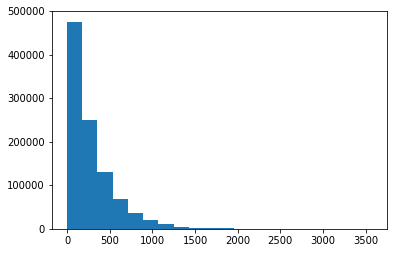

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(y, 20)
plt.show()

## Random Generation

Python contains the `random.expovariate` method which should give us similar intervals.   

Let's see by averaging a large sum of them.

In [101]:
from random import expovariate

sum([expovariate(lmbda) for i in range(count)])/count

276.4522516153353

This method can be defined ([source file](https://github.com/python/cpython/blob/3.7/Lib/random.py)) as follows:  

In [102]:
from random import random
import math

def lib_expovariate(lambd):
    """Exponential distribuion.
    
        lambd is 1.0 divided by the desired mean.  It should be
        nonzero. Returned values range from 0 to positive infinity 
        if lambd is positive, and from negative infinity to 0 if 
        lambd is negative.
    """
    
    # lambd: rate lambd = 1/mean
    # ('lambda' is a Python reserved word)
    
    # we use 1-random() instead of random() to preclude the
    # possibility of taking the log of zero.
    
    # Note: random.random() - returns the next random number in the range [0.0, 1.0)
    return -math.log(1.0 - random()) / lambd

sum([lib_expovariate(lmbda) for i in range(count)]) / count

276.28406148376365

For completeness, we can also use NumPy's `random.poisson` method if we pass in $1/ \lambda$.

In [103]:
y = np.random.exponential(1.0/lmbda, count)

print(np.cumsum(y)[:10])
np.average(y)

[ 660.32936945 1054.21850667 1078.92606538 1083.32362471 1116.55436627
 1194.36665473 1437.64387648 1769.43453995 1874.66474281 1881.98463021]


276.1442632686023

Again, this is in agreement with our expected average interval. Note the numbers (and histogram plots) won't match exactly as we are dealing with random time intervals.

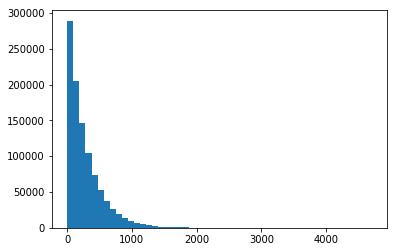

In [104]:
x = range(count)
y = [expovariate(lmbda) for i in x]
plt.hist(y, 50)
plt.show()

## Event Times

For a timeline of events, we can simply generate a sequence of independent intervals, and then generate a running sum of them for absolute timestamps. 

In [105]:
intervals = [expovariate(lmbda) for i in range(1000)]
timestamps = [0.0]
timestamp = 0.0
for t in intervals:
    timestamp += t
    timestamps.append(timestamp)

timestamps[:10]

[0.0,
 45.382349816246496,
 128.50737428052577,
 272.3421983522992,
 862.0068573411846,
 1645.6475032311519,
 1679.4975869583552,
 3236.1967571537534,
 3301.9081150510424,
 3513.61733229393]

In [106]:
deltas = [y - x for x, y in zip(timestamps, timestamps[1:])]
deltas[:10]

[45.382349816246496,
 83.12502446427928,
 143.83482407177343,
 589.6646589888854,
 783.6406458899672,
 33.850083727203355,
 1556.6991701953982,
 65.71135789728896,
 211.70921724288746,
 25.7482888287077]

In [107]:
sum(deltas) / len(deltas)

274.19850804025833

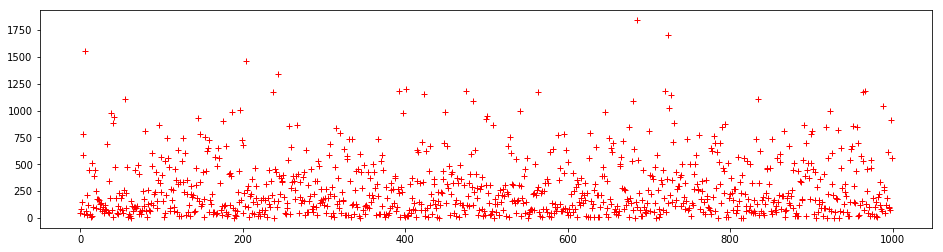

In [108]:
deltas = [y - x for x, y in zip(timestamps, timestamps[1:])]
plt.figure(figsize=(16, 4))
plt.plot(deltas, 'r+')
plt.show()

Here we can readily see how the time between events is distributed, with most of the deltas below 1.0 with some fairly large outliers. This is to be expected as $T_{n}$ will always be greater than $T_{n-1}$ but perhaps not by much.

Finally, let's generate $T=23.0$ hours worth of timestamps and see if we have close to our desired $N$ value. We will do this 100 times and then average the counts. We should have a value that is very close to $N=10,000$.

In [111]:
limit = T * 60
counts = []
test = []

for iter in range(100):
    count = 0
    timestamp = 0.0
    timestamps = []
    while timestamp < limit:
        timestamp += lib_expovariate(lmbda)
        timestamps.append(timestamp)
        count += 1
    test.append(timestamps)
    counts.append(count)

print(limit)
for i in test:
    if len(i) == 5:
        print(i)
        break

print(counts)
print(sum(counts) / len(counts))

1380.0
[462.37159256754296, 690.6959716891945, 692.0489137065479, 977.3114945174093, 1486.3331988657865]
[8, 5, 4, 3, 3, 6, 6, 10, 8, 7, 8, 7, 7, 8, 6, 3, 9, 7, 5, 6, 5, 5, 6, 10, 3, 5, 7, 11, 10, 3, 7, 4, 5, 4, 7, 5, 5, 7, 6, 9, 8, 6, 6, 7, 4, 4, 5, 3, 4, 5, 6, 6, 4, 9, 5, 6, 4, 3, 6, 7, 7, 4, 9, 2, 4, 5, 10, 8, 5, 4, 7, 8, 6, 11, 5, 1, 5, 10, 4, 7, 5, 9, 8, 1, 6, 5, 5, 5, 6, 7, 5, 4, 3, 7, 3, 7, 10, 4, 6, 9]
5.95
